In [1]:
import numpy as np
import iris
import iris.plot as iplt
import iris.coord_categorisation as ccad
import matplotlib.pyplot as plt
from cartopy import crs
from datetime import datetime, timedelta

iris.FUTURE.netcdf_promote = True
iris.FUTURE.cell_datetime_objects = True

In [62]:
x = iris.load('../../data/analyses/gl_union_mes.nc', 'geopotential')[0] / 9.8

In [136]:
%matplotlib nbagg

In [174]:
def delay(cube, dt):
    x = cube.copy()
    t = x.coord(axis='t')
    d = x.coord_dims(t.name())[0]
    n = t.units.num2date(t.points) + dt
    x.remove_coord(t.name())
    x.add_dim_coord(
        iris.coords.DimCoord(t.units.date2num(n), 
                             units=t.units, 
                             **{s: getattr(t, s) for s in ['standard_name', 'long_name', 'var_name']}), d)
    return x

def xtr(cube, h):
    x = cube.copy().extract(iris.Constraint(hour = h))
    x.remove_coord('hour')
    return x

In [190]:
x = iris.load('../../data/analyses/ERA-ppt-SH.nc')[0]

/home/arno/Documents/code/conda/envs/iris/lib/python3.6/site-packages/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


In [191]:
y = delay(x, timedelta(hours=-1)) # because 0h has the accumulation of the previous 12h
ccad.add_hour(y, 'time', 'hour')
ccad.add_day_of_year(y, 'time', 'day')
ccad.add_year(y, 'time', 'year')
ccad.add_month(y, 'time', 'month')
ccad.add_season(y, 'time', 'season')
y.remove_coord('time')

In [192]:
ppt = xtr(y, 23) + xtr(y, 11)

In [193]:
print(ppt)

unknown / (m)                       (-- : 14061; latitude: 121; longitude: 480)
     Dimension coordinates:
          latitude                      -                x               -
          longitude                     -                -               x
     Auxiliary coordinates:
          day                           x                -               -
          month                         x                -               -
          season                        x                -               -
          year                          x                -               -


In [224]:
proj = crs.SouthPolarStereo()

In [234]:
m = ppt.collapsed(['day'], iris.analysis.MEAN)

/home/arno/Documents/code/conda/envs/iris/lib/python3.6/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'day'.
  warnings.warn(msg.format(self.name()))
/home/arno/Documents/code/conda/envs/iris/lib/python3.6/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'year'.
  warnings.warn(msg.format(self.name()))


In [209]:
m = x.collapsed('time', iris.analysis.MEAN)

/home/arno/Documents/code/conda/envs/iris/lib/python3.6/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


<IPython.core.display.Javascript object>


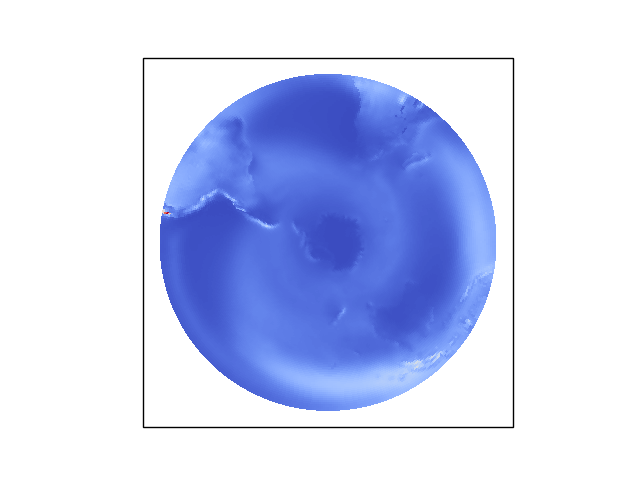

/home/arno/Documents/code/conda/envs/iris/lib/python3.6/site-packages/iris/coords.py:826: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/arno/Documents/code/conda/envs/iris/lib/python3.6/site-packages/iris/coords.py:826: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


In [235]:
fig = plt.figure()
plt.subplot(1, 1, 1, projection=proj)

iplt.pcolormesh(m)

In [222]:
p.axes.set_extent?

In [64]:
x1 = x.extract(iris.Constraint(time = lambda t: t < datetime(1990,1,1))).collapsed('time', iris.analysis.MEAN)
x2 = x.extract(iris.Constraint(time = lambda t: t > datetime(2000,1,1))).collapsed('time', iris.analysis.MEAN)

/home/arno/Documents/code/conda/envs/iris/lib/python3.6/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


In [96]:
winter = x.extract(iris.Constraint(season='jja'))

In [109]:
x1 = winter.extract(iris.Constraint(time = lambda t: t < datetime(1990,1,1))).collapsed('time', iris.analysis.MEAN)
x2 = winter.extract(iris.Constraint(time = lambda t: t > datetime(2000,1,1))).collapsed('time', iris.analysis.MEAN)

/home/arno/Documents/code/conda/envs/iris/lib/python3.6/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/home/arno/Documents/code/conda/envs/iris/lib/python3.6/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'year'.
  warnings.warn(msg.format(self.name()))


In [105]:
t = winter.coord('time')
t = t.units.num2date(t.points).astype('datetime64')

<IPython.core.display.Javascript object>


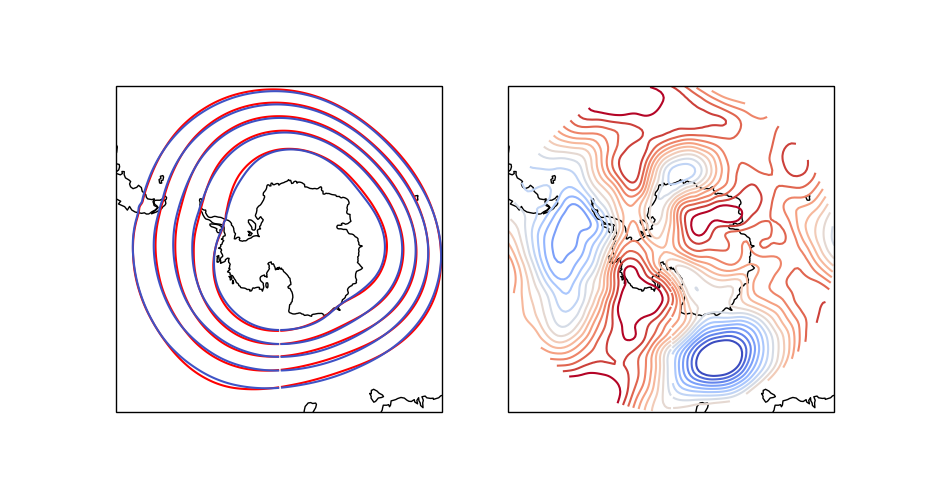

In [110]:
lvls = np.arange(5000,5500,100)

fig = plt.figure()
plt.subplot(1, 2, 1, projection=proj)
iplt.contour(x1, levels=lvls, colors=['r'])
p = iplt.contour(x2, levels=lvls, colors=['y'])
p.ax.coastlines()
plt.subplot(1, 2, 2, projection=proj)
plt.set_cmap('coolwarm')
p = iplt.contour(x2-x1, range(-16, 16, 2))
p.ax.coastlines()

<IPython.core.display.Javascript object>


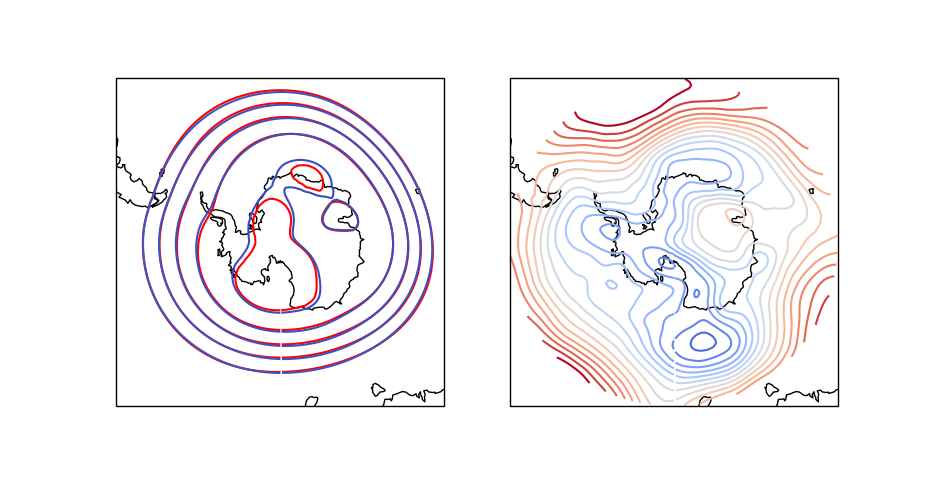

In [90]:
lvls = np.arange(5000,5500,100)

fig = plt.figure()
plt.subplot(1, 2, 1, projection=proj)
iplt.contour(x1, levels=lvls, colors=['r'])
p = iplt.contour(x2, levels=lvls, colors=['y'])
p.ax.coastlines()
plt.subplot(1, 2, 2, projection=proj)
plt.set_cmap('coolwarm')
p = iplt.contour(x2-x1, range(-16, 16, 2))
p.ax.coastlines()

In [1]:
import sys
sys.path.append('../python/')
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import SubplotParams
from cartopy import crs
from helpers import nearest
from functools import partial
from IPython.display import Image

%matplotlib nbagg

In [2]:
sys.path.append('../conda/envs/bayes/lib/python3.6/site-packages/')
import tensorflow as tf

In [4]:
from IPython.display import set_matplotlib_formats
%matplotlib inline

set_matplotlib_formats('png', 'pdf')

In [3]:
ep = xr.open_dataset('../../data/analyses/ERA-ep-SH.nc')
ep['time'] = ep.time - pd.Timedelta('1h')
ep = ep.sel(lat=slice(-55,None)).resample('D', 'time', how='sum')
p_min_e = ep['tp'] + ep['e']
ppt = ep['tp']

In [4]:
proj = crs.SouthPolarStereo()

In [8]:
dp = ps.sel(time=slice('2005', None)).mean('time') - ps.sel(time=slice(None,'1990')).mean('time')

In [5]:
class box(object):
    def __init__(self, *x):
        self.x1, self.x2, self.y1, self.y2 = x
    
    @property
    def rect(self):
        return [(self.x1, self.x1, self.x2, self.x2, self.x1), (self.y1, self.y2, self.y2, self.y1, self.y1)]
    
    def isel(self, x):
        i = np.where((x.lon >= min(self.x1, self.x2)) & (x.lon <= max(self.x1, self.x2)))[0]
        j = np.where((x.lat >= min(self.y1, self.y2)) & (x.lat <= max(self.y1, self.y2)))[0]
        return x.isel(lon=i, lat=j)

ij = partial(nearest, *np.meshgrid(ppt.lon, ppt.lat))

Coordenadas testigo Sch-1: 79°31'13,9''S / 84°08'56,3''W (Testigo Sch-2 está unos 300m de este)

74°34’37S, 86°54’16W (Ferrigno / Pine Island)

74°29’46S, 81°40’41W (Bryan Coast)

ASL region (defined 170–290°E, 60–75°S)

In [6]:
cores = pd.DataFrame(columns=['lat', 'lon'])
cores.loc['SCH-1'] = [-(79 + 31/60 + 31.8/3600), -(84 + 8/60 + 56.3/3600)]
cores.loc['Ferrigno'] = [-(74 + 34/60 + 37/3600), -(86 + 54/60 + 16/3600)]
cores.loc['Bryan'] = [-(74 + 29/60 + 46/3600), -(81 +40/60 + 41/3600)]
cores['i'], cores['j'] = zip(*[ij(j, i)[:2] for i,j in cores.values]) # i->lat, j->lon
cores

,lat,lon,i,j
SCH-1,-79.525500,-84.148972,32,128
Ferrigno,-74.576944,-86.904444,25,124
Bryan,-74.496111,-81.678056,25,131


In [42]:
a = box(-90, -79, -78, -81)
b = box(-90, -79, -73, -76)

In [6]:
def isel(x, s):
    i, j = cores.loc[s][['i', 'j']].astype(int)
    return x.isel(lat=i, lon=j)

def roll(x, win):
    return x.to_dataframe('x')['x'].rolling(win, win_type='gaussian', center=True)

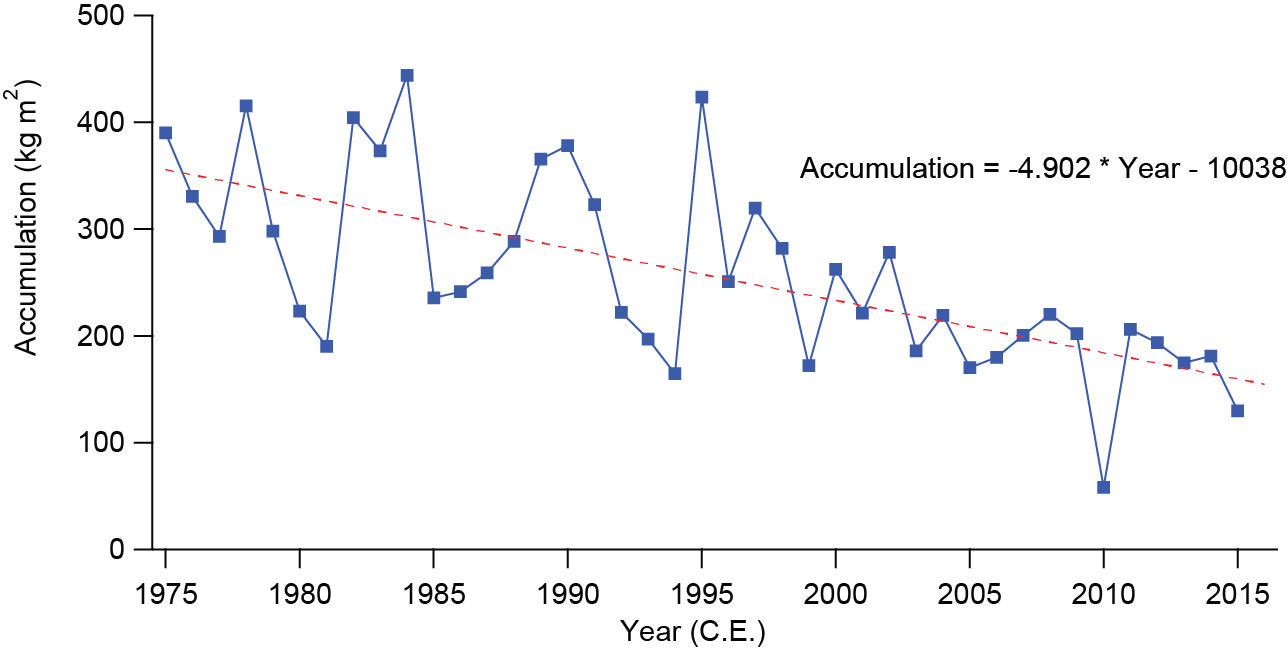

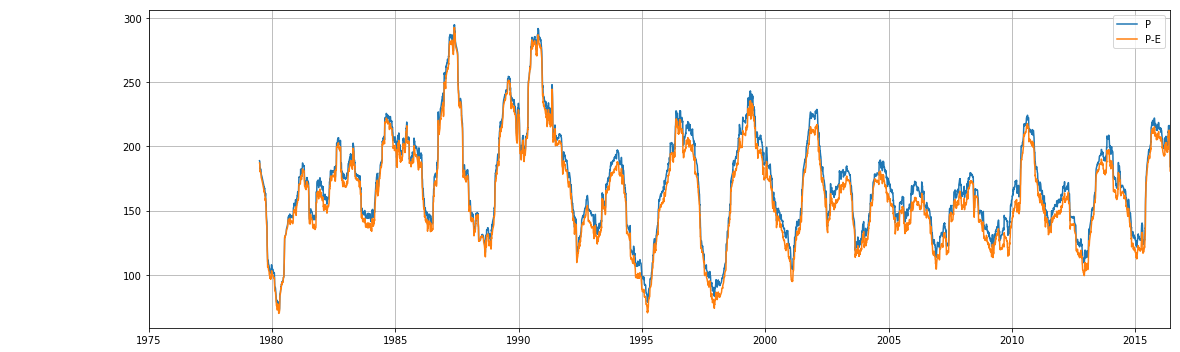

In [96]:
plt.figure(figsize=(16.5,5))
plt.subplot2grid((1, 10), (0, 0), 1, 1)
plt.axis('off')
plt.subplot2grid((1, 10), (0, 1), 1, 9)
plt.plot(roll(isel(ppt, 'SCH-1'), 365).mean(std=180) * 1000 * 365, label='P')
plt.plot(roll(isel(p_min_e, 'SCH-1'), 365).mean(std=180) * 1000 * 365, label='P-E')
plt.grid()
plt.gca().set_xlim('1975', '2016-06')
plt.gca().set_xticks(np.arange('1975', '2016', '5', dtype='datetime64'))
plt.tight_layout()
plt.legend()
Image('files/Accumulation.png')

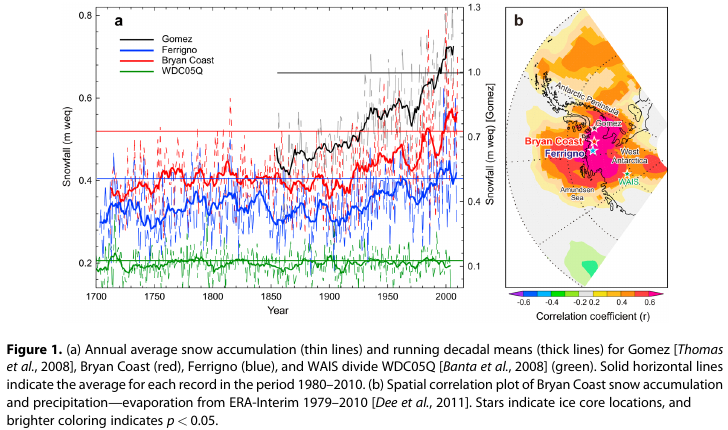

In [116]:
Image('files/ThomasFig1.png')

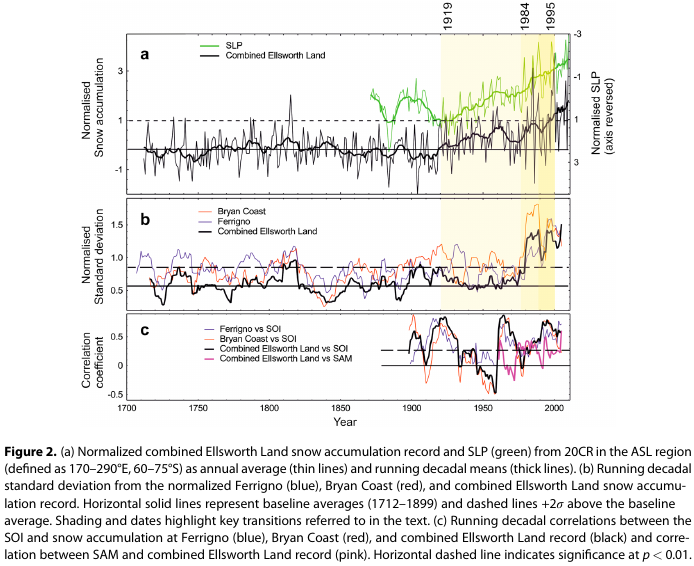

In [120]:
Image('files/ThomasFig2.png')

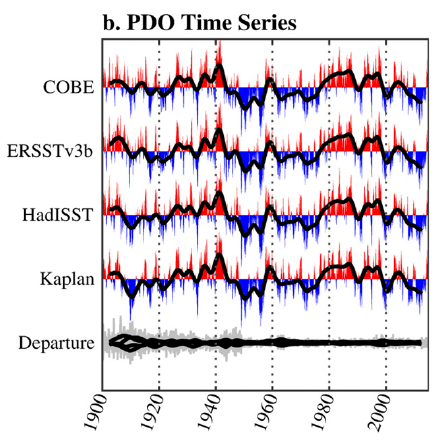

In [121]:
Image('files/NewmanPDO.png')

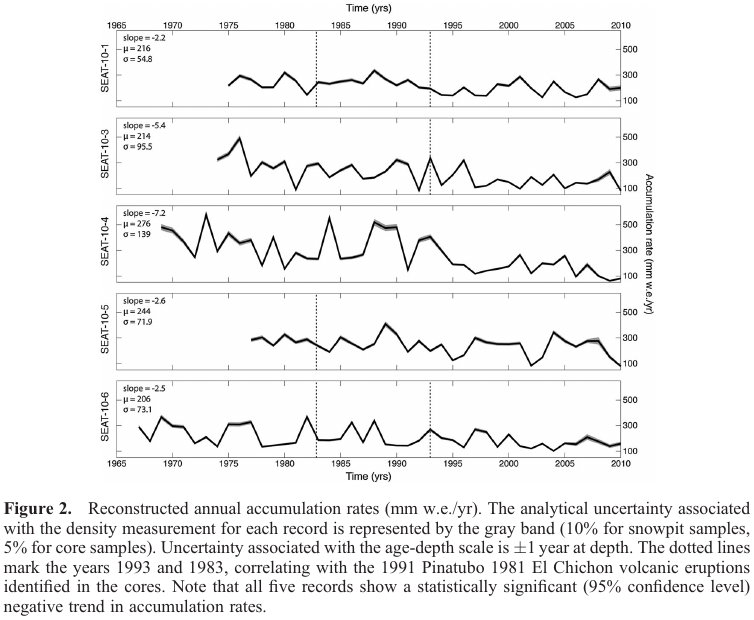

In [117]:
Image('files/BurgenerFig2.png')

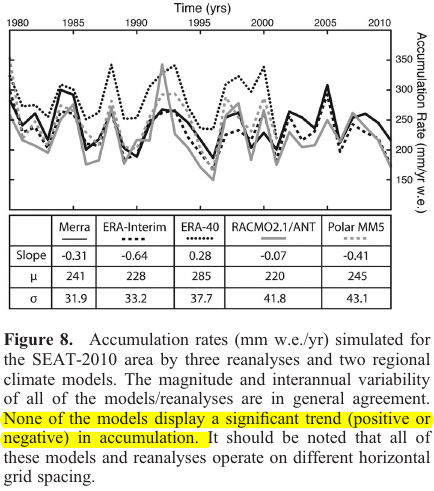

In [118]:
Image('files/BurgenerFig8.png')

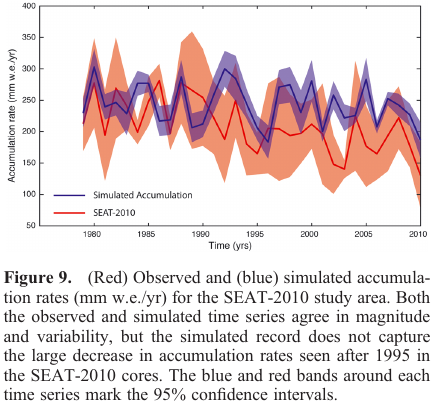

In [119]:
Image('files/BurgenerFig9.png')

In [99]:
class base(object):
    def __init__(self, Y, mask=None, mean=True, std=True):
        s = lambda x: x.stack(d = ('lat', 'lon'))
        if mask is None:
            self.Y = s(Y).transpose('time', 'd')
        else:
            self.Y = s(Y).sel(d = s(mask).values.astype(bool).flatten()).transpose('time', 'd')
        self.n, self.d = self.Y.shape
    
    def standardize(self):
        self.YY = (self.Y - self.Y.mean('time')) / self.Y.std('time')
        
    def lstsq(self):
        t = self.Y.time.values.astype('datetime64[D]').astype(float)
        b = np.linalg.lstsq(np.r_[t,np.ones(len(t))].reshape((2,-1)).T, self.Y.values)[0]
        self.b = xr.DataArray(b, coords=[('param', ['slope', 'const']), ('d', self.Y.indexes['d'])])
        self.pred = np.array([[t[0],t[-1]]]) * b[0, :].reshape((-1, 1)) + b[1, :].reshape((-1, 1))
        
    def tflstsq(self):
        t = self.Y.time.values.astype('datetime64[D]').astype(float)
        gr = tf.Graph()
        with gr.as_default():
            x = tf.constant(t, tf.float64)
            targ = tf.placeholder(tf.float64)
            X = tf.stack((tf.ones_like(x), x), axis=1)
            lsq = tf.matrix_solve_ls(X, targ)
        with tf.Session(graph=gr) as s:
            b = s.run(lsq, {targ: self.Y.values})
        self.b = xr.DataArray(b, coords=[('param', ['bias', 'slope']), ('d', self.Y.indexes['d'])])
        
    def plot(self, x):
        plt.figure()
        ax = plt.axes(projection=crs.SouthPolarStereo())
        ax.coastlines()
        p = ax.pcolormesh(x.lon, x.lat, x, transform=crs.PlateCarree())
        plt.colorbar(p)
        plt.show()

In [110]:
b = base(p_min_e.sel(time=slice(None,'2015')))

In [93]:
b.tflstsq()

In [97]:
plt.set_cmap('coolwarm')

<IPython.core.display.Javascript object>


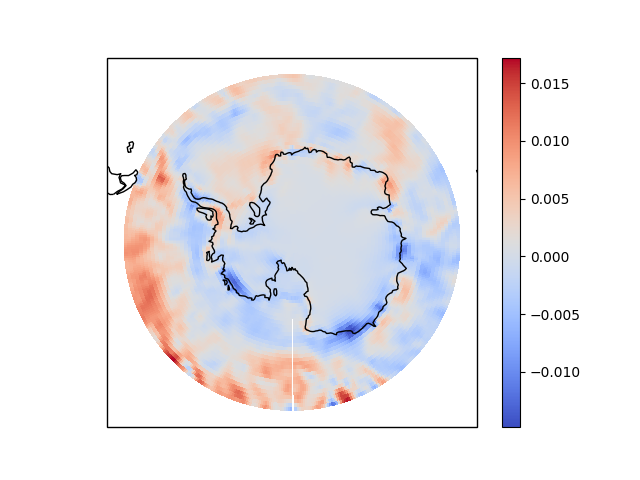

In [98]:
b.plot(b.b.sel(param='const').unstack('d')*365240)

In [111]:
b.lstsq()

In [72]:
import gc
gc.collect()

18089

<IPython.core.display.Javascript object>


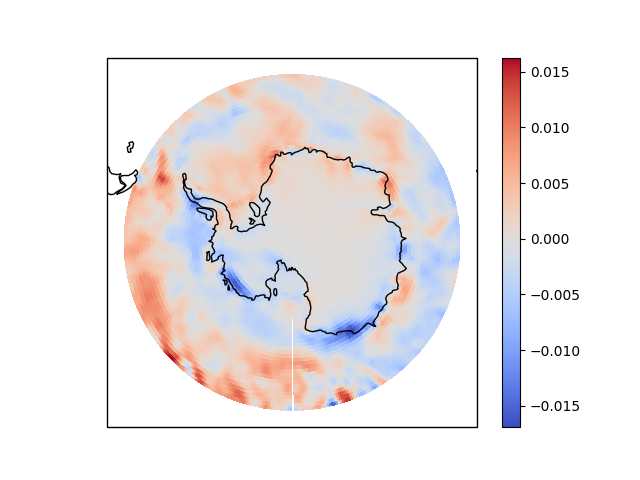

In [112]:
b.plot(b.b.sel(param='slope').unstack('d')*365240)

Please make sure that
 -   PATH includes /usr/local/cuda-8.0/bin
 -   LD_LIBRARY_PATH includes /usr/local/cuda-8.0/lib64, or, add /usr/local/cuda-8.0/lib64 to /etc/ld.so.conf and run ldconfig as root

<IPython.core.display.Javascript object>


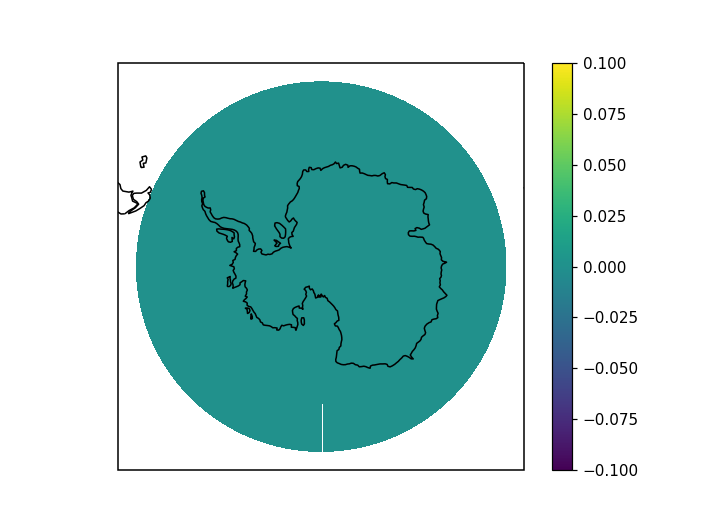

In [53]:
plt.figure()
ax = plt.axes(projection=proj)
ax.coastlines()
p = ax.pcolormesh(m.lon, m.lat, u, transform=crs.PlateCarree())
plt.colorbar(p)

<IPython.core.display.Javascript object>


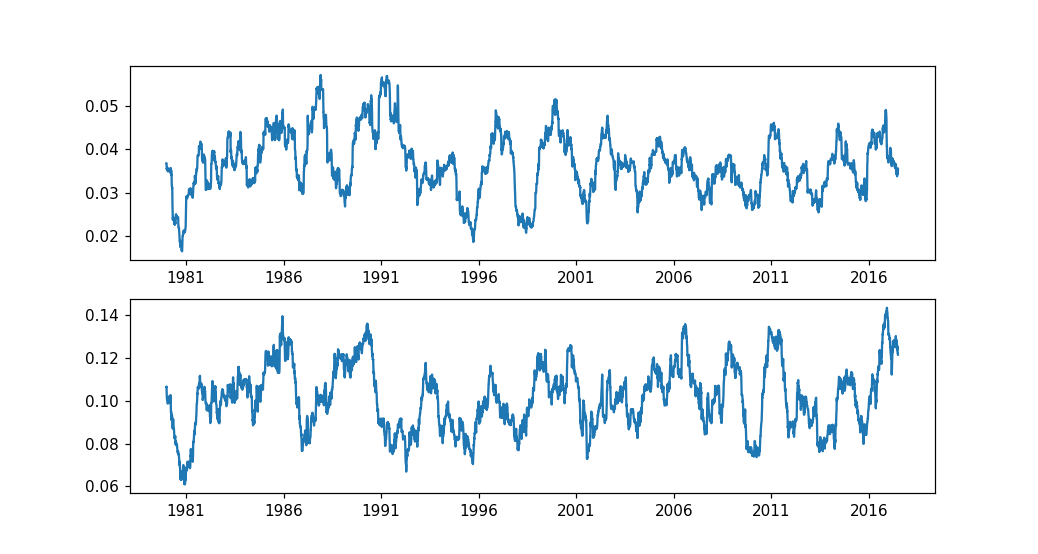

In [50]:
plt.figure()
plt.subplot(2,1,1)
t = a.isel(ps).groupby('time').sum().rolling(time=365).mean()
plt.plot(t.time, t)
plt.subplot(2,1,2)
t = b.isel(ps).groupby('time').sum().rolling(time=365).mean()
plt.plot(t.time, t)

<IPython.core.display.Javascript object>


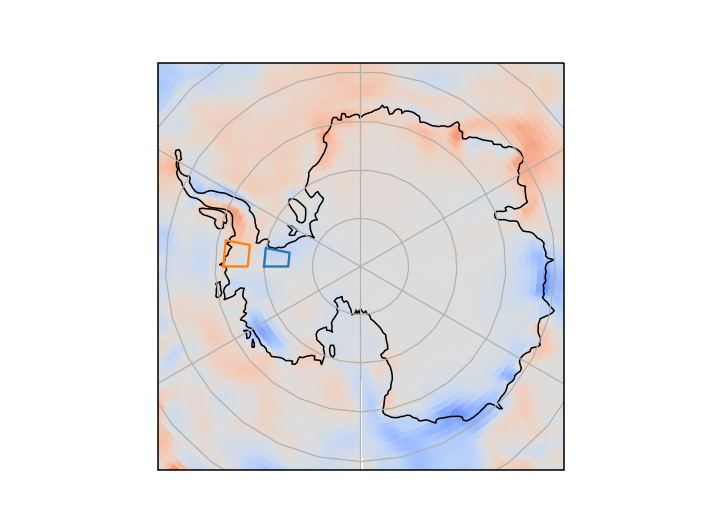

In [219]:
plt.figure()
ax = plt.axes(projection=proj)
ax.coastlines()
ax.gridlines()
plt.pcolormesh(dp.lon, dp.lat, dp*1000, vmin=-5e-1, vmax=5e-1, transform=crs.PlateCarree())
ax.plot(*a.rect, transform=crs.PlateCarree())
ax.plot(*b.rect, transform=crs.PlateCarree())
plt.gca().set_extent((-180,180,-90,-65), crs.PlateCarree())

<IPython.core.display.Javascript object>


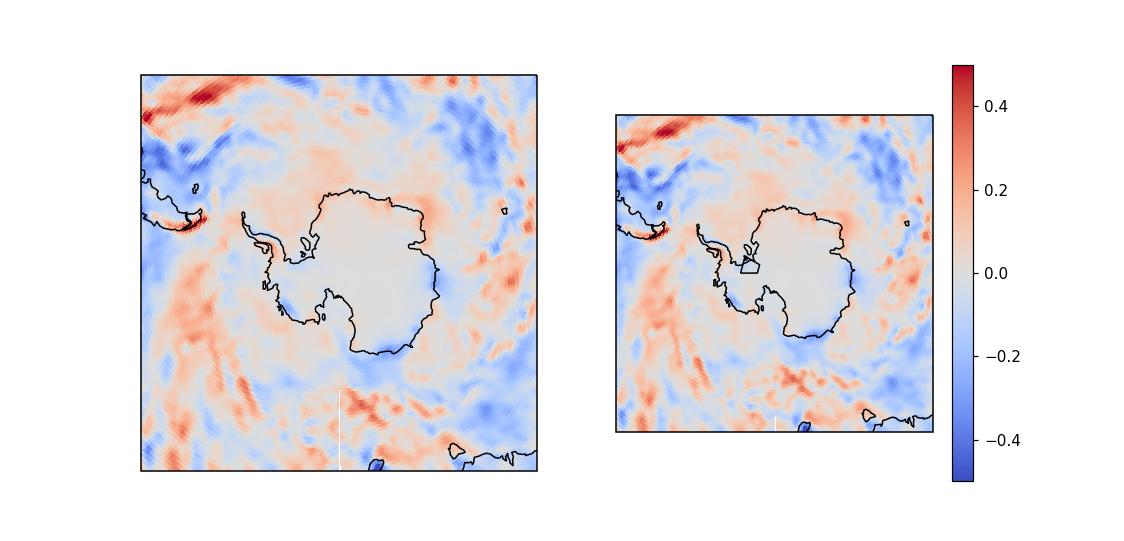

In [188]:
plt.figure()
plt.set_cmap('coolwarm')
plt.subplot(1, 2, 1, projection=proj)
plt.pcolormesh(dp.lon, dp.lat, dp*1000, vmin=-5e-1, vmax=5e-1, transform=crs.PlateCarree())
plt.gca().coastlines()
plt.gca().set_extent((-180,180,-90,-45), crs.PlateCarree())
plt.subplot(1, 2, 2, projection=proj)
plt.pcolormesh(dp.lon, dp.lat, dp*1000, vmin=-5e-1, vmax=5e-1, transform=crs.PlateCarree())
plt.gca().add_feature(c, edgecolor='k', facecolor='')
plt.gca().coastlines()
plt.gca().set_extent((-180,180,-90,-45), crs.PlateCarree())
plt.colorbar(p)